# Name : Divya K

# The Spark Foundation || GRIP NOV20 || TASK 3

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("C:\\Users\\admin\\Desktop\\projects\\sparkfoundationinternship\\SampleSuperstore.csv")

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.shape

(9994, 13)

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df = data.rename(columns={'Ship Mode': 'Ship_Mode','Sub-Category':'sub_category'})

In [9]:
df

,Ship_Mode,Segment,Country,City,State,Postal Code,Region,Category,sub_category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


EDA

In [10]:
df.Ship_Mode.value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship_Mode, dtype: int64

In [11]:
df.Segment.value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [12]:
df.Category.value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
df.sub_category.value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: sub_category, dtype: int64

[Text(0, 0, 'Second Class'),
 Text(0, 0, 'Standard Class'),
 Text(0, 0, 'First Class'),
 Text(0, 0, 'Same Day')]

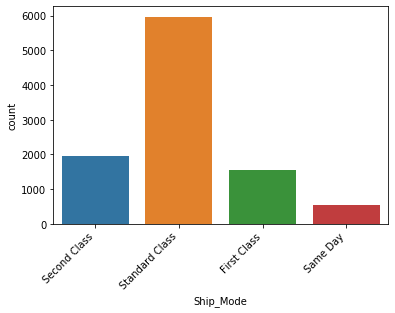

In [14]:
chart = sns.countplot(df.Ship_Mode)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [15]:
d1 = df.groupby(['Ship_Mode'])['Profit'].sum().to_frame().reset_index()
d1

,Ship_Mode,Profit
0,First Class,48969.8399
1,Same Day,15891.7589
2,Second Class,57446.6354
3,Standard Class,164088.7875


In [16]:
d2 = df.groupby(['City'])['Profit'].sum().to_frame().reset_index()
d2

,City,Profit
0,Aberdeen,6.6300
1,Abilene,-3.7584
2,Akron,-186.6356
3,Albuquerque,634.0881
4,Alexandria,318.6183
...,...,...
526,Woonsocket,78.6791
527,Yonkers,2767.7557
528,York,-102.1692
529,Yucaipa,13.2080


In [17]:
d3 = df.groupby(['sub_category'])['Profit'].sum().to_frame().reset_index()
d3

,sub_category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6527.7870
3,Binders,30221.7633
4,Bookcases,-3472.5560
5,Chairs,26590.1663
6,Copiers,55617.8249
7,Envelopes,6964.1767
8,Fasteners,949.5182
9,Furnishings,13059.1436


In [18]:
df["cp"] = df['Sales']-df["Profit"]

In [19]:
d4=df.groupby("sub_category")["cp"].sum()

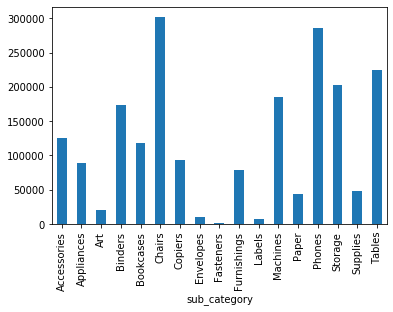

In [20]:
d4.plot(kind="bar")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

<Figure size 7200x14400 with 0 Axes>

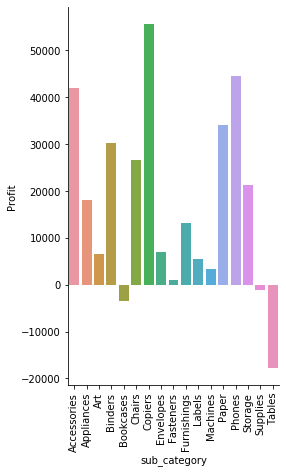

In [21]:
plt.figure(figsize = (100,200))
sns.catplot(x="sub_category", y="Profit",data=d3, kind="bar",height=6, aspect=.7)
plt.xticks(rotation = 90)

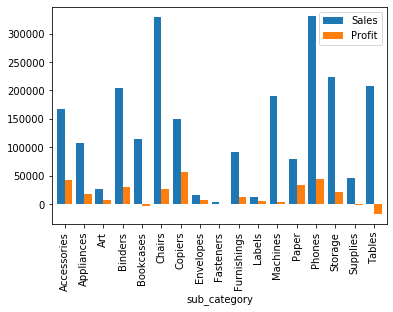

In [22]:

group=df.groupby("sub_category")["Sales","Profit"].sum()
group.plot(kind="bar",width=0.8)

plt.show()

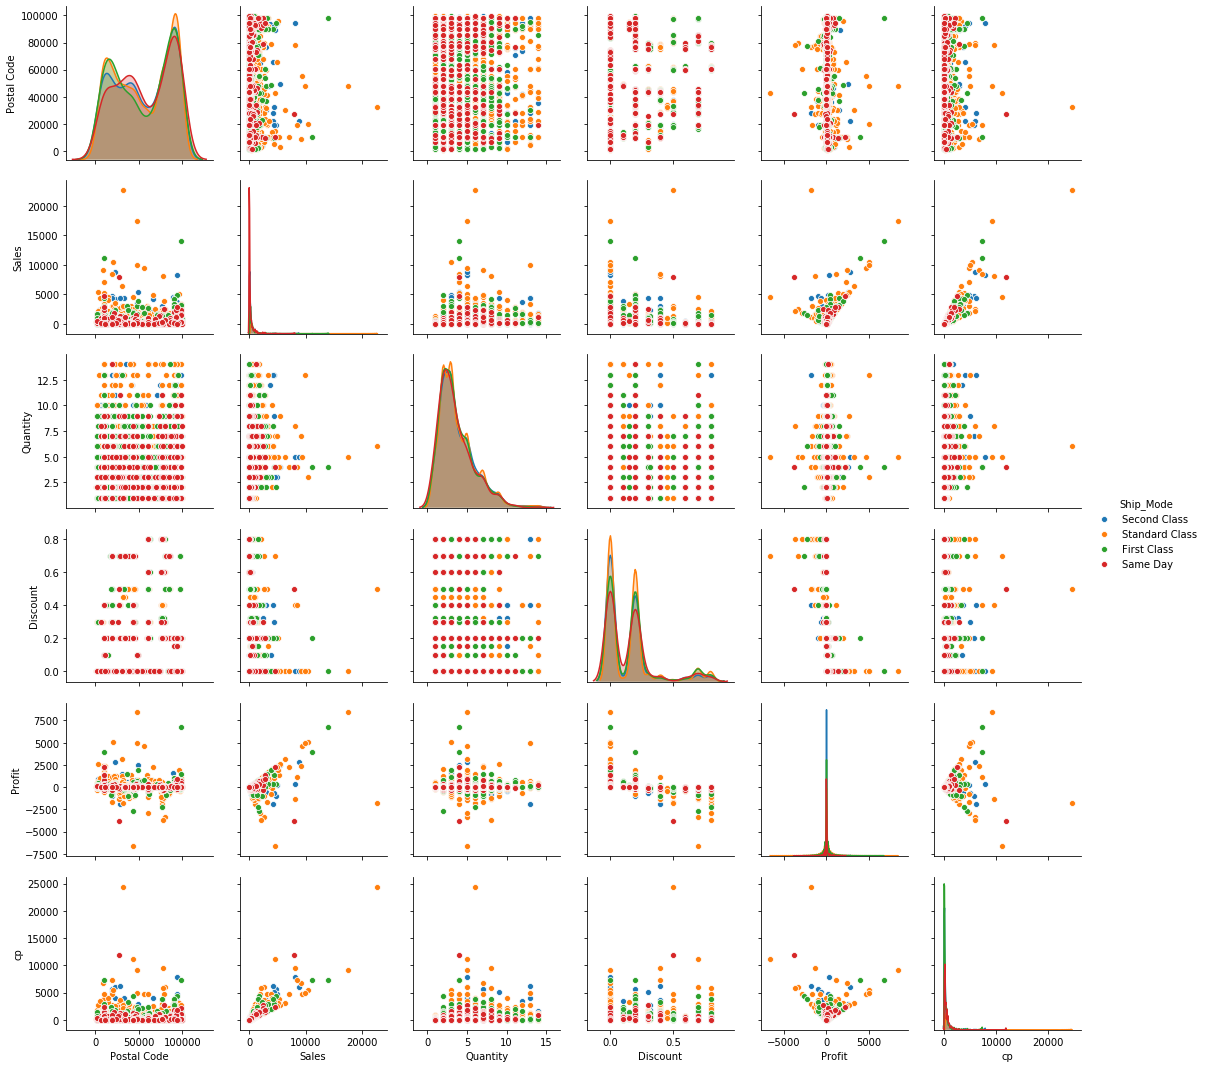

In [23]:
sns.pairplot(df, hue = 'Ship_Mode')

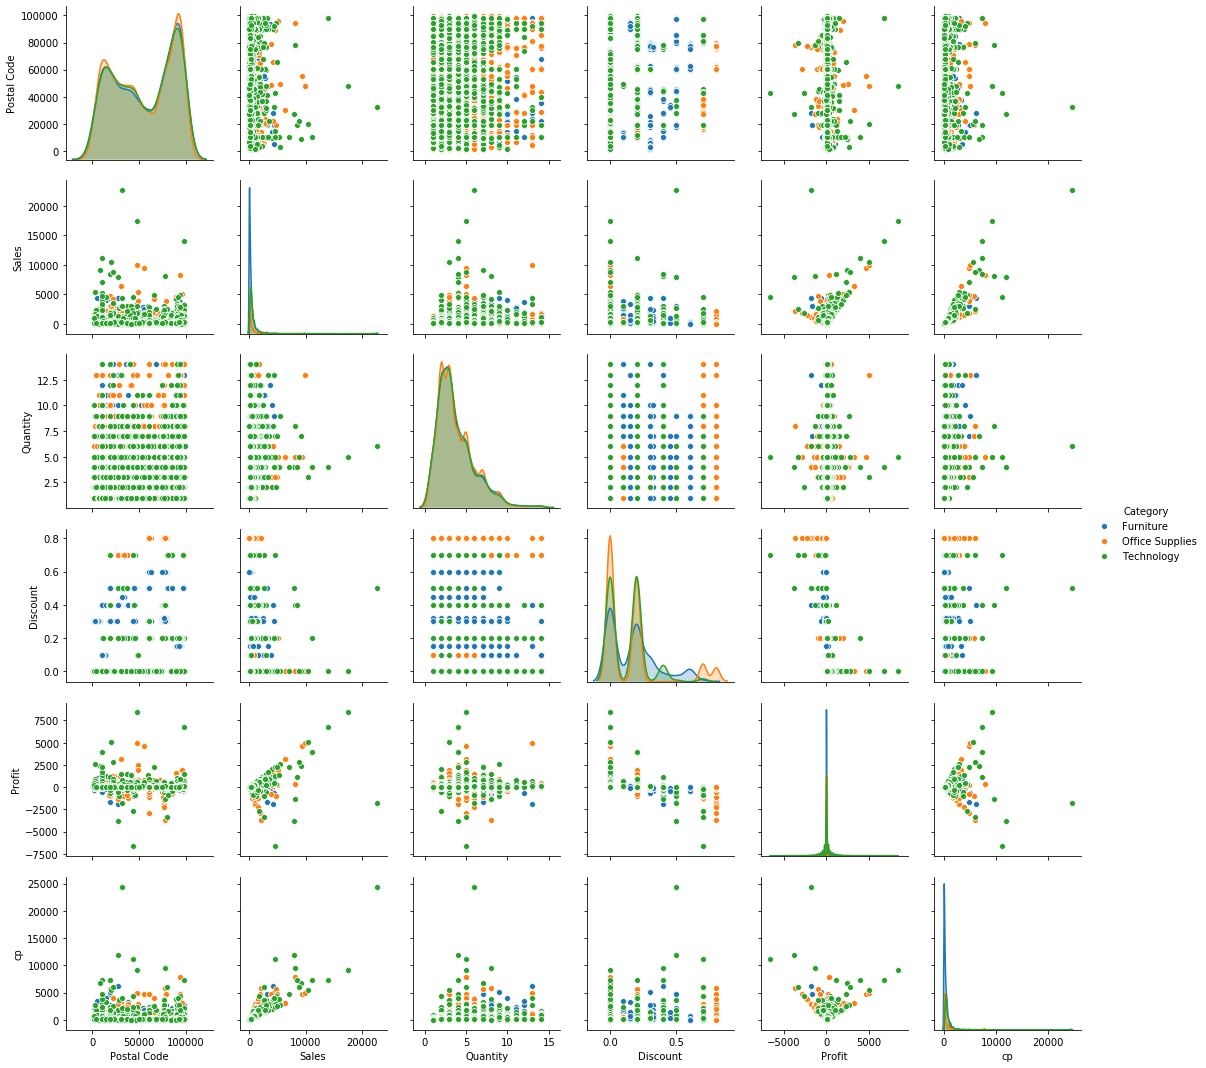

In [24]:
sns.pairplot(df,hue='Category')

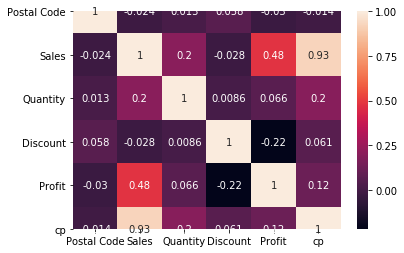

In [25]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

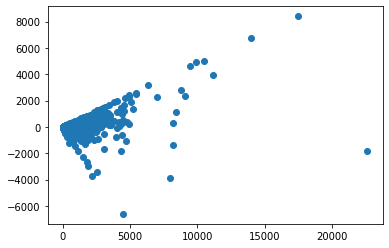

In [26]:
plt.scatter(x = df["Sales"], y = df["Profit"])

In [27]:

df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

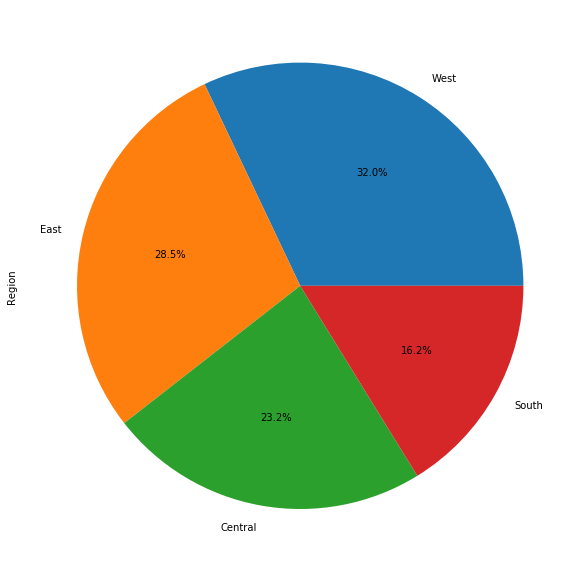

In [28]:
fig = plt.figure(figsize =(10, 20)) 

df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

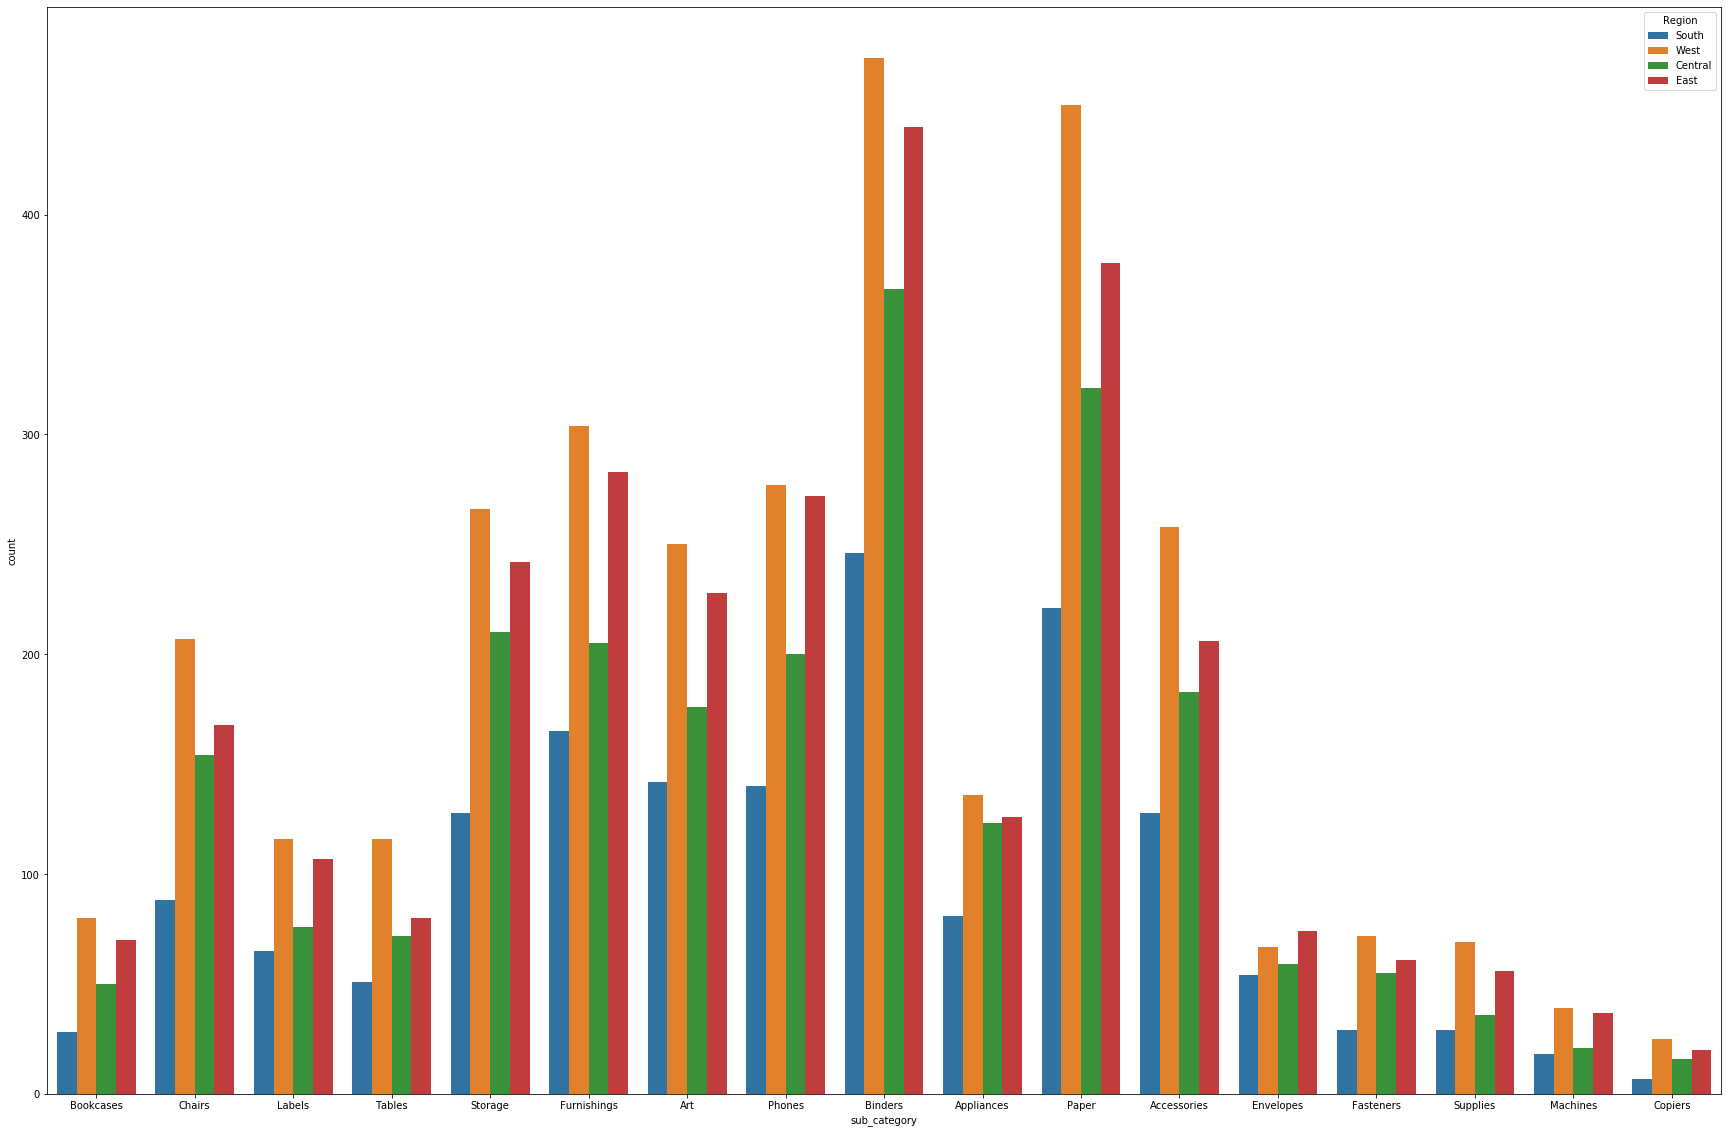

In [29]:
fig = plt.figure(figsize =(30, 20)) 
sns.countplot(x="sub_category",data=df,hue="Region")

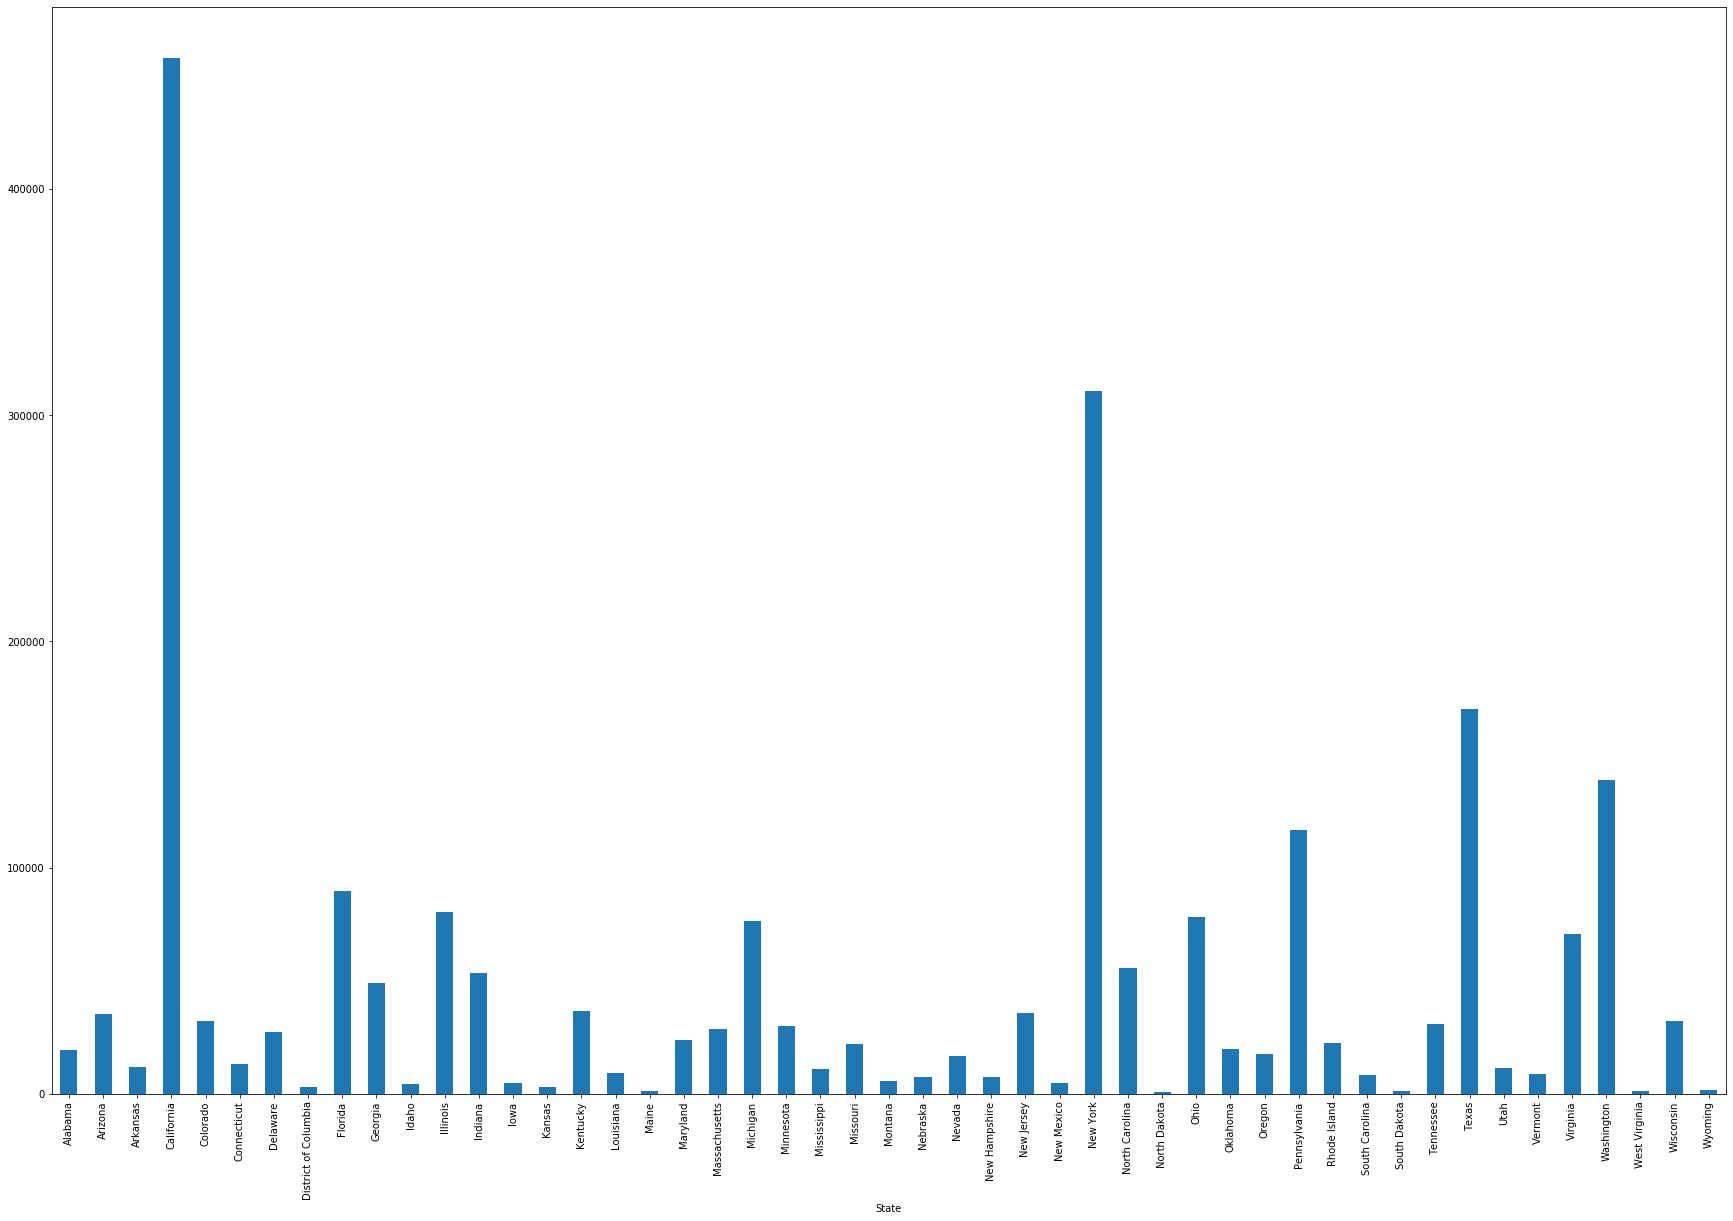

In [30]:
state_wise=df.groupby("State")["Sales"].sum()
fig = plt.figure(figsize =(30, 20)) 
state_wise.plot(kind="bar")


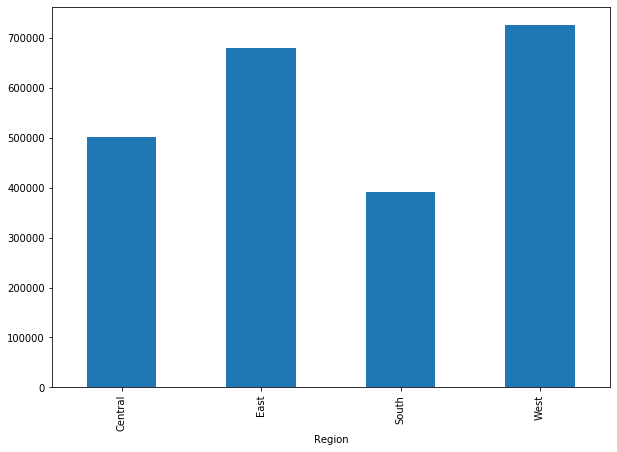

In [31]:
region_wise=df.groupby("Region")["Sales"].sum()
fig = plt.figure(figsize =(10, 7)) 
region_wise.plot(kind="bar")

---------------END------------------